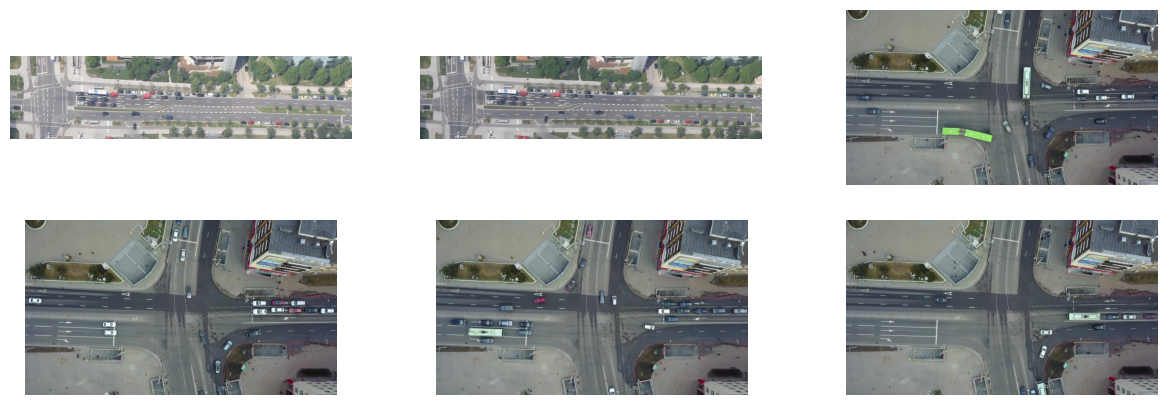

In [31]:
# Show sample images from the training set
import os
import matplotlib.pyplot as plt
import cv2

train_img_dir = './cars/train/images'
img_files = [f for f in os.listdir(train_img_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Display first 5 images
plt.figure(figsize=(15, 5))
for i, img_file in enumerate(img_files[:6]):
    img_path = os.path.join(train_img_dir, img_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, i+1)  # Adjust the grid to 2 rows and 3 columns
    plt.imshow(img)
    # plt.title(img_file)
    plt.axis('off')
plt.show()



In [39]:
# Custom training using YOLOv11
from ultralytics import YOLO

model = YOLO('yolo11n.pt')  # Load pre-trained YOLOv11 model

# Start training
results = model.train(
    data='./cars/data.yaml',
    epochs=20,
    imgsz=640,
    batch=16,
    project='yolo11_custom_train',
    name='exp',
    exist_ok=True,
    device='cpu'  # 0, 'cpu', 'mps'
)

print('Training complete!')

New https://pypi.org/project/ultralytics/8.3.191 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.188 🚀 Python-3.13.5 torch-2.8.0 CPU (Apple M2)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./cars/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True


image 1/1 /Users/sakdahomhuan/Dev/gistnorth_iot_cubesat/trainmodel/cars/test/images/DJI_0005-0203_jpg.rf.eeb59641da0f785efff104acb5df07a6.jpg: 384x640 (no detections), 44.1ms
Speed: 4.6ms preprocess, 44.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /Users/sakdahomhuan/Dev/gistnorth_iot_cubesat/trainmodel/cars/test/images/DJI_0005-0203_jpg.rf.eeb59641da0f785efff104acb5df07a6.jpg: 384x640 (no detections), 44.1ms
Speed: 4.6ms preprocess, 44.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /Users/sakdahomhuan/Dev/gistnorth_iot_cubesat/trainmodel/cars/test/images/harlem-0024_jpg.rf.b677bca9eae17162532507b783c88107.jpg: 384x640 (no detections), 36.9ms
Speed: 1.4ms preprocess, 36.9ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /Users/sakdahomhuan/Dev/gistnorth_iot_cubesat/trainmodel/cars/test/images/harlem-0024_jpg.rf.b677bca9eae17162532507b783c88107.jpg: 384x640 (no detections), 36.9ms
Speed: 1.

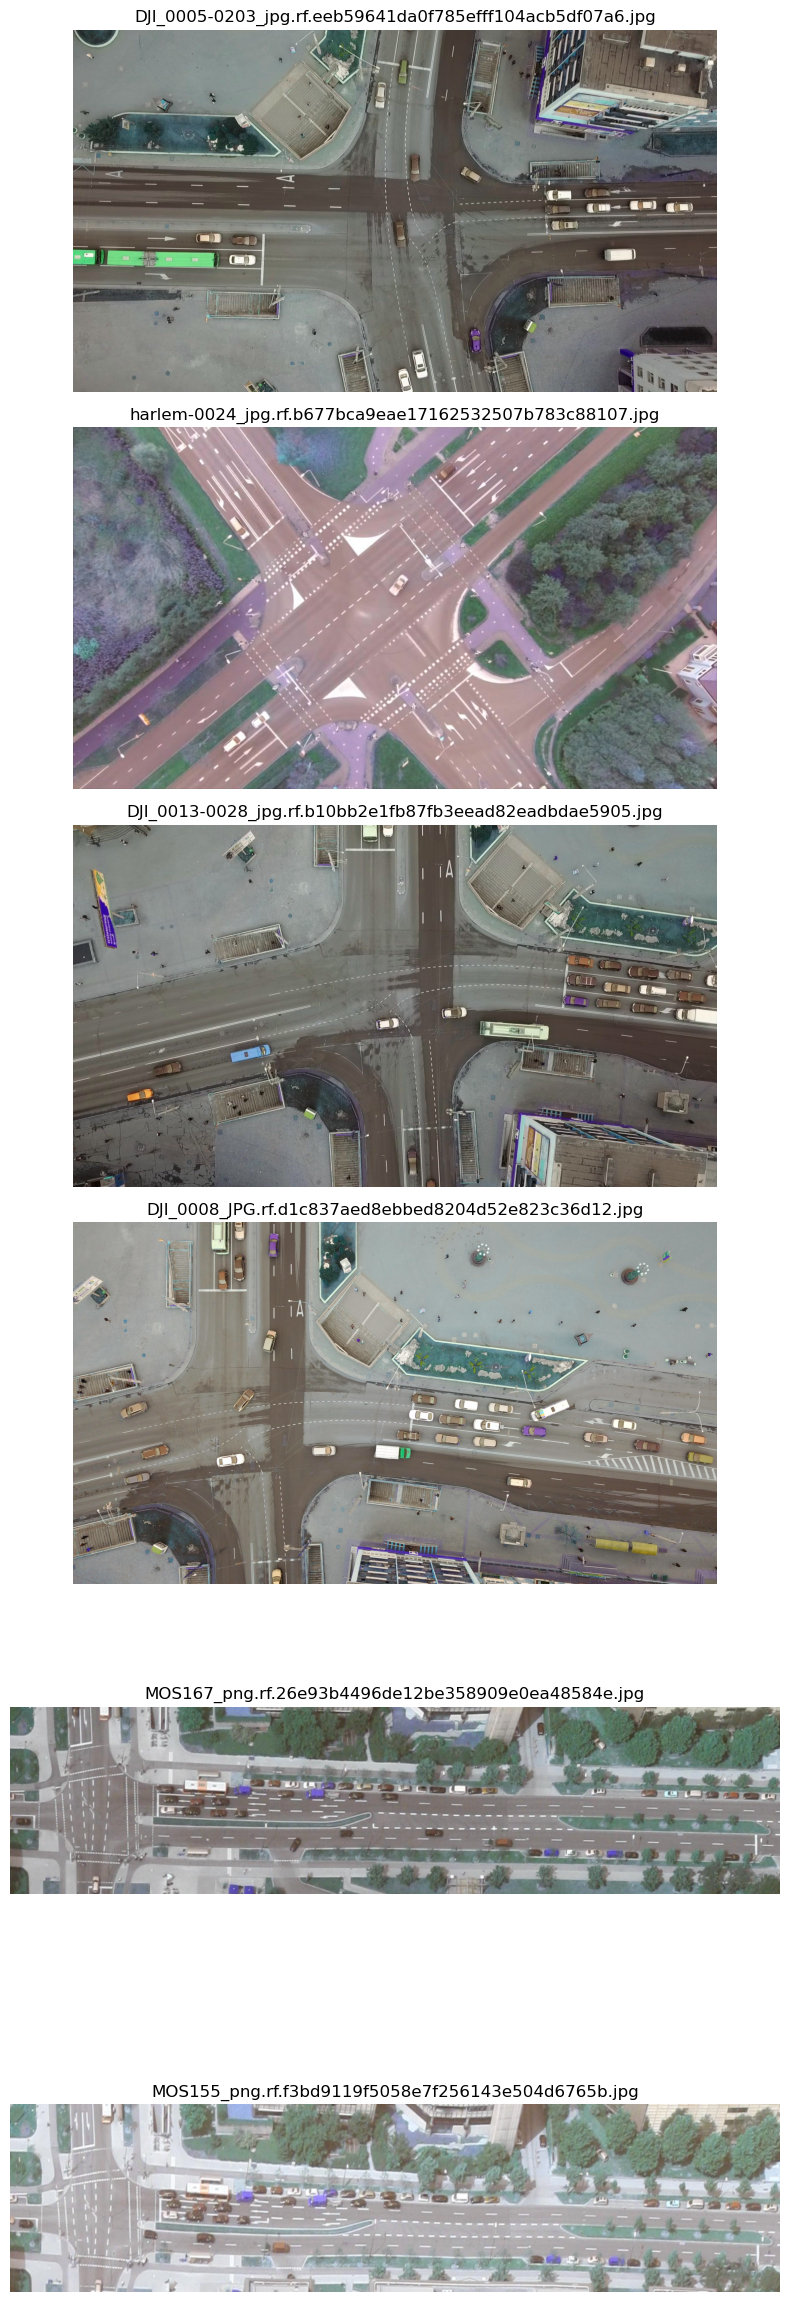

In [ ]:
# Show predictions with box on test set images
import glob
from PIL import Image
import numpy as np

# Load the trained model (update path if you have a best.pt from training)
model = YOLO('yolo11_custom_train/exp/weights/best.pt') 

test_img_dir = './cars/test/images'
test_img_files = glob.glob(os.path.join(test_img_dir, '*'))

num_imgs = min(6, len(test_img_files))
plt.figure(figsize=(8, num_imgs * 4))
for i, img_path in enumerate(test_img_files[:num_imgs]):
    results = model(img_path)
    # If ultralytics >=8.0.0, results[0].plot() returns an array with boxes drawn
    result_img = results[0].plot() if hasattr(results[0], 'plot') else np.array(Image.open(img_path))
    plt.subplot(num_imgs, 1, i+1)
    plt.imshow(result_img)
    plt.title(os.path.basename(img_path))
    plt.axis('off')
plt.tight_layout()
plt.show()